In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [5]:
# Load the .mat file
mat_data = loadmat('../data/ho/GRSS2013.mat')
contest_data = loadmat('../data/ho/2013_IEEE_GRSS_DF_Contest_CASI_349_1905_144.mat')

In [6]:
# Print the dictionary keys to see available variables
print("Variables in the .mat file:")
print(mat_data.keys())
print(contest_data.keys())

Variables in the .mat file:
dict_keys(['__header__', '__version__', '__globals__', 'name'])
dict_keys(['__header__', '__version__', '__globals__', 'ans'])


In [7]:
print(mat_data['name'])  # To see what's in the 'name' variable
print(contest_data['ans'])  # To see what's in the 'ans' variable

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[[   0    0    0 ...    0    0    0]
  [   0    0    0 ...    0    0    0]
  [   0    0    0 ...    0    0    0]
  ...
  [   0    0    0 ...    0    0    0]
  [   0    0    0 ...    0    0    0]
  [   0    0    0 ...    0    0    0]]

 [[   0    0    0 ...    0    0    0]
  [   0    0    0 ...    0    0    0]
  [   0    0    0 ...    0    0    0]
  ...
  [   0    0    0 ...    0    0    0]
  [   0    0    0 ...    0    0    0]
  [   0    0    0 ...    0    0    0]]

 [[   0    0    0 ...    0    0    0]
  [   0    0    0 ...    0    0    0]
  [   0    0    0 ...    0    0    0]
  ...
  [   0    0    0 ...    0    0    0]
  [   0    0    0 ...    0    0    0]
  [   0    0    0 ...    0    0    0]]

 ...

 [[   0    0    0 ...    0    0    0]
  [   0    0    0 ...    0    0    0]
  [   0    0    0 ...    0    0    0]
  ...
  [ 567  821  983 ... 6388 6450 6057]
  [   0 

In [8]:
# Check the shape and content of matrices
print("Shape of name matrix:", mat_data['name'].shape)
print("Sample values from name:", mat_data['name'][:5, :5])  # First 5x5 elements
print("\nShape of ans matrix:", contest_data['ans'].shape)
print("Sample values from ans:", contest_data['ans'][:5, :5])  # First 5x5 elements

# Check if all values are zero
print("\nAre all values in name zero?", np.all(mat_data['name'] == 0))
print("Are all values in ans zero?", np.all(contest_data['ans'] == 0))

# Check data type of matrices
print("\nData type of name:", mat_data['name'].dtype)
print("Data type of ans:", contest_data['ans'].dtype)

Shape of name matrix: (349, 1905)
Sample values from name: [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

Shape of ans matrix: (349, 1905, 144)
Sample values from ans: [[[    0     0     0 ...     0     0     0]
  [    0     0     0 ...     0     0     0]
  [    0     0     0 ...     0     0     0]
  [    0     0     0 ...     0     0     0]
  [    0     0     0 ...     0     0     0]]

 [[    0     0     0 ...     0     0     0]
  [    0     0     0 ...     0     0     0]
  [    0     0     0 ...     0     0     0]
  [    0     0     0 ...     0     0     0]
  [    0     0     0 ...     0     0     0]]

 [[    0     0     0 ...     0     0     0]
  [    0     0     0 ...     0     0     0]
  [    0     0     0 ...     0     0     0]
  [    0     0     0 ...     0     0     0]
  [    0     0     0 ...     0     0     0]]

 [[  549   635   796 ...  8268  8527  8467]
  [  512   678   783 ...  8695  8773  8567]
  [  533   689   786 ...  9138  9148  9124]
  [  569   670

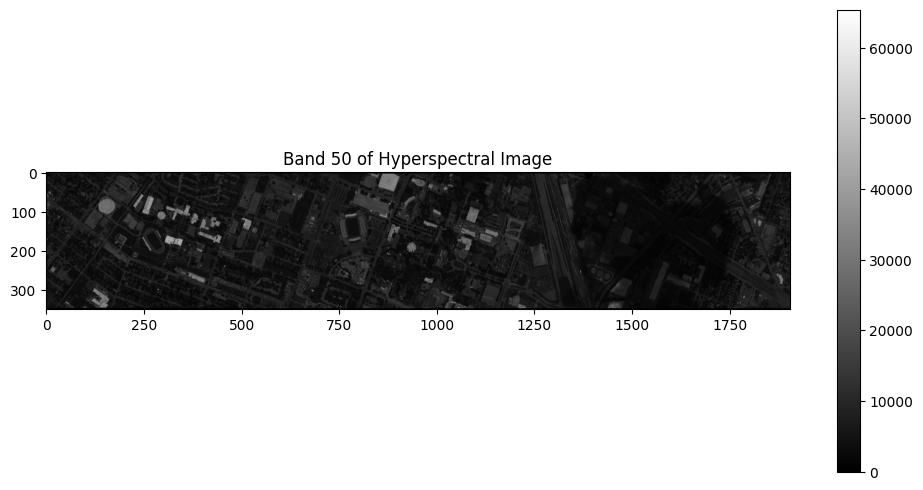

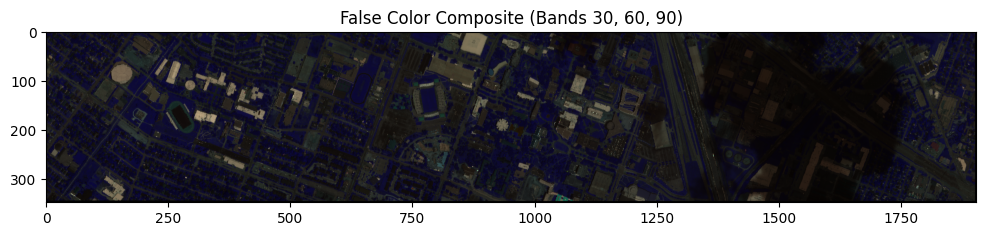

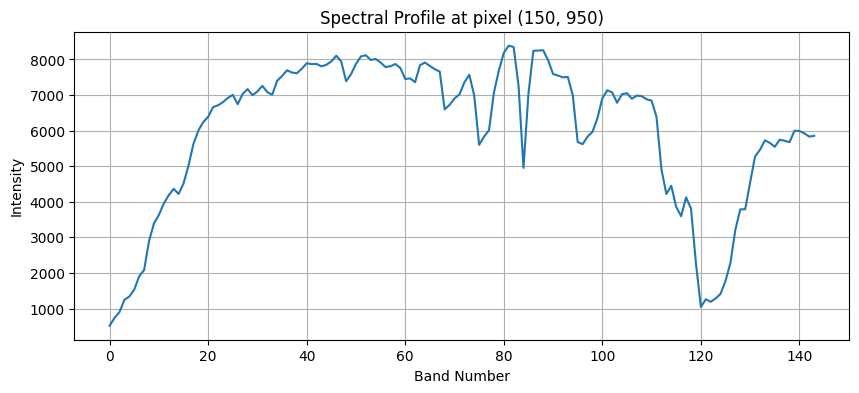

In [10]:
# 1. Display a single band as a grayscale image
band_idx = 50  # Choose a middle band
plt.figure(figsize=(12, 6))
plt.imshow(contest_data['ans'][:, :, band_idx], cmap='gray')
plt.colorbar()
plt.title(f'Band {band_idx} of Hyperspectral Image')
plt.show()

# 2. Create a false color composite using three bands
rgb_bands = [30, 60, 90]  # Choose three bands for RGB display
false_color = np.dstack([contest_data['ans'][:, :, b] for b in rgb_bands])
# Normalize to 0-1 range for display
false_color = false_color / false_color.max()

plt.figure(figsize=(12, 6))
plt.imshow(false_color)
plt.title('False Color Composite (Bands {}, {}, {})'.format(*rgb_bands))
plt.show()

# 3. Show spectral profile of a pixel
pixel_pos = (150, 950)  # Choose a pixel position
spectral_profile = contest_data['ans'][pixel_pos[0], pixel_pos[1], :]

plt.figure(figsize=(10, 4))
plt.plot(spectral_profile)
plt.title(f'Spectral Profile at pixel {pixel_pos}')
plt.xlabel('Band Number')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()

In [5]:
import rasterio  # for reading .tif files
import numpy as np

# Try to read the train ROI
with rasterio.open('../data/ho/train_roi.tif') as src:
    train_gt = src.read()
    print("Train ROI shape:", train_gt.shape)
    print("Unique classes in training:", np.unique(train_gt))

# Try to read the validation ROI
with rasterio.open('../data/ho/val_roi.tif') as src:
    val_gt = src.read()
    print("\nValidation ROI shape:", val_gt.shape)
    print("Unique classes in validation:", np.unique(val_gt))

Train ROI shape: (1, 349, 1905)
Unique classes in training: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]

Validation ROI shape: (1, 349, 1905)
Unique classes in validation: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


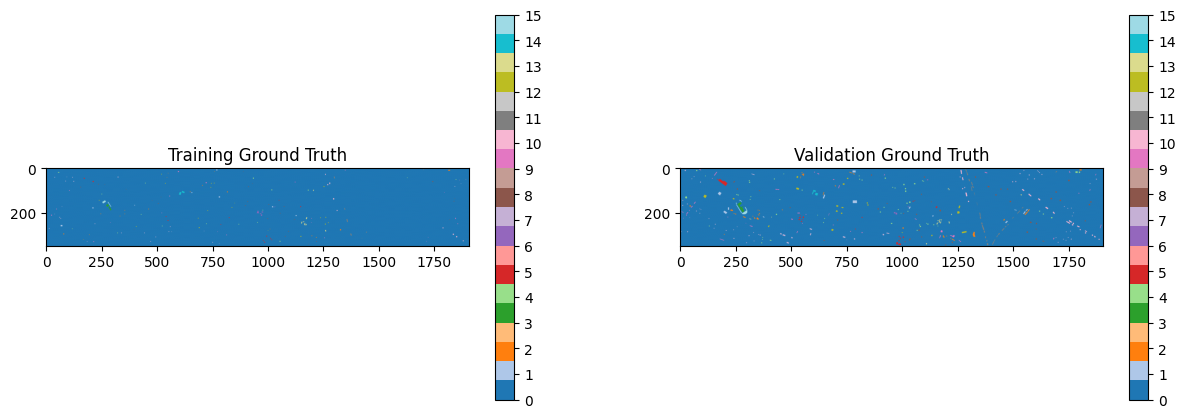


Class distribution in training set:
Class 0: 662013 pixels (99.57%)
Class 1: 198 pixels (0.03%)
Class 2: 190 pixels (0.03%)
Class 3: 192 pixels (0.03%)
Class 4: 188 pixels (0.03%)
Class 5: 186 pixels (0.03%)
Class 6: 182 pixels (0.03%)
Class 7: 196 pixels (0.03%)
Class 8: 191 pixels (0.03%)
Class 9: 193 pixels (0.03%)
Class 10: 191 pixels (0.03%)
Class 11: 181 pixels (0.03%)
Class 12: 192 pixels (0.03%)
Class 13: 184 pixels (0.03%)
Class 14: 181 pixels (0.03%)
Class 15: 187 pixels (0.03%)

Class distribution in validation set:
Class 0: 652648 pixels (98.17%)
Class 1: 1053 pixels (0.16%)
Class 2: 1064 pixels (0.16%)
Class 3: 505 pixels (0.08%)
Class 4: 1056 pixels (0.16%)
Class 5: 1056 pixels (0.16%)
Class 6: 143 pixels (0.02%)
Class 7: 1072 pixels (0.16%)
Class 8: 1053 pixels (0.16%)
Class 9: 1059 pixels (0.16%)
Class 10: 1036 pixels (0.16%)
Class 11: 1054 pixels (0.16%)
Class 12: 1041 pixels (0.16%)
Class 13: 285 pixels (0.04%)
Class 14: 247 pixels (0.04%)
Class 15: 473 pixels (0.07%

In [7]:
import matplotlib.pyplot as plt

# Create a colormap for 16 classes
colors = plt.cm.tab20(np.linspace(0, 1, 16))  # 16 distinct colors

# Plot training ground truth
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.imshow(train_gt[0], cmap='tab20')  # [0] because shape is (1, 349, 1905)
plt.colorbar(ticks=np.arange(16))
plt.title('Training Ground Truth')

# Plot validation ground truth
plt.subplot(122)
plt.imshow(val_gt[0], cmap='tab20')
plt.colorbar(ticks=np.arange(16))
plt.title('Validation Ground Truth')
plt.show()

# Print class distribution
print("\nClass distribution in training set:")
for cls in range(16):
    count = np.sum(train_gt[0] == cls)
    percentage = (count / train_gt[0].size) * 100
    print(f"Class {cls}: {count} pixels ({percentage:.2f}%)")

print("\nClass distribution in validation set:")
for cls in range(16):
    count = np.sum(val_gt[0] == cls)
    percentage = (count / val_gt[0].size) * 100
    print(f"Class {cls}: {count} pixels ({percentage:.2f}%)")